In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy.stats as stats
# warnings.filterwarnings('ignore')

In [2]:
BLS_data_20171 = pd.read_excel('all_data_M_2017.xlsx')  # parameter (sheetname='sheet_name') is optional
BLS_data_20171.to_csv('all_data_M_2017.csv', index=False)  # index=True to write row index
BLS_data_20181 = pd.read_excel('all_data_M_2018.xlsx')  # parameter (sheetname='sheet_name') is optional
BLS_data_20181.to_csv('all_data_M_2018.csv', index=False)  # index=True to write row index


BLS_data_2017 = pd.read_csv("all_data_M_2017.csv")
BLS_data_2018 = pd.read_csv("all_data_M_2018.csv")
set_2017_df = BLS_data_2017[["area_title","naics_title","occ_code","a_median","h_median","tot_emp","naics","o_group","own_code"]]
set_2018_df = BLS_data_2018[["area_title","naics_title","occ_code","a_median","h_median","tot_emp","naics","o_group","own_code"]]

C:\Users\adria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\adria\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,12,13,14,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
set_2017_df

,area_title,naics_title,occ_code,a_median,h_median,tot_emp,naics,o_group,own_code
0,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235
1,U.S.,Cross-industry,11-0000,102590,49.32,7280330,0,major,1235
2,U.S.,Cross-industry,11-1000,103120,49.58,2473740,0,minor,1235
3,U.S.,Cross-industry,11-1010,183270,88.11,210160,0,broad,1235
4,U.S.,Cross-industry,11-1011,183270,88.11,210160,0,detailed,1235
5,U.S.,Cross-industry,11-1020,100410,48.27,2212200,0,broad,1235
6,U.S.,Cross-industry,11-1021,100410,48.27,2212200,0,detailed,1235
7,U.S.,Cross-industry,11-1030,25630,*,51380,0,broad,1235
8,U.S.,Cross-industry,11-1031,25630,*,51380,0,detailed,1235
9,U.S.,Cross-industry,11-2000,123100,59.19,685780,0,minor,1235


In [4]:
set_2017_df=set_2017_df.loc[set_2017_df['o_group'] == 'total']
set_2018_df=set_2018_df.loc[set_2018_df['o_group'] == 'total']

In [5]:
set_2017_df=set_2017_df.loc[set_2017_df['area_title'] == 'U.S.']
set_2018_df=set_2018_df.loc[set_2018_df['area_title'] == 'U.S.']

In [6]:
set_2017_df.head()

,area_title,naics_title,occ_code,a_median,h_median,tot_emp,naics,o_group,own_code
0,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235
1382,U.S.,"Cross-industry, private ownership only",00-0000,35710,17.17,120851270,1,total,5
2744,U.S.,"Agriculture, Forestry, Fishing and Hunting",00-0000,24480,11.77,424020,11,total,5
3061,U.S.,"Mining, Quarrying, and Oil and Gas Extraction",00-0000,51670,24.84,591130,21,total,5
3589,U.S.,Utilities,00-0000,73930,35.55,552270,22,total,5


In [7]:
combined_data = pd.merge(set_2017_df, set_2018_df, on="occ_code", suffixes=('_2017', '_2018'), how='inner')
combined_data.head()

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018
0,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,Cross-industry,38640,18.58,144733270,000000,total,1235
1,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,"Cross-industry, private ownership only",36750,17.67,122999150,000001,total,5
2,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,"Agriculture, Forestry, Fishing and Hunting",25500,12.26,427090,11,total,5
3,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,Forestry and Logging,41050,19.73,48780,113000,total,5
4,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,Logging,41050,19.73,48780,113300,total,5


In [8]:
combined_data = pd.merge(set_2017_df, set_2018_df, on="occ_code", suffixes=('_2017', '_2018'), how='inner')
tech_data2017 = combined_data.loc[combined_data["naics_title_2017"] == "Data Processing, Hosting, and Related Services", :]
tech_data2017.head()

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018
115368,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,Cross-industry,38640,18.58,144733270,000000,total,1235
115369,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,"Cross-industry, private ownership only",36750,17.67,122999150,000001,total,5
115370,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,"Agriculture, Forestry, Fishing and Hunting",25500,12.26,427090,11,total,5
115371,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,Forestry and Logging,41050,19.73,48780,113000,total,5
115372,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,Logging,41050,19.73,48780,113300,total,5


In [9]:
tech_data2018 = combined_data.loc[combined_data["naics_title_2018"] == "Data Processing, Hosting, and Related Services", :]
tech_data2018.head()

,area_title_2017,naics_title_2017,occ_code,a_median_2017,h_median_2017,tot_emp_2017,naics_2017,o_group_2017,own_code_2017,area_title_2018,naics_title_2018,a_median_2018,h_median_2018,tot_emp_2018,naics_2018,o_group_2018,own_code_2018
257,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
258,U.S.,Cross-industry,00-0000,37690,18.12,142549250,0,total,1235,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5
713,U.S.,"Cross-industry, private ownership only",00-0000,35710,17.17,120851270,1,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
714,U.S.,"Cross-industry, private ownership only",00-0000,35710,17.17,120851270,1,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5
1169,U.S.,"Agriculture, Forestry, Fishing and Hunting",00-0000,24480,11.77,424020,11,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5


In [10]:
tech_datamerge = pd.merge(tech_data2017, tech_data2018, on='occ_code', how='inner')
tech_datamerge

,area_title_2017_x,naics_title_2017_x,occ_code,a_median_2017_x,h_median_2017_x,tot_emp_2017_x,naics_2017_x,o_group_2017_x,own_code_2017_x,area_title_2018_x,...,o_group_2017_y,own_code_2017_y,area_title_2018_y,naics_title_2018_y,a_median_2018_y,h_median_2018_y,tot_emp_2018_y,naics_2018_y,o_group_2018_y,own_code_2018_y
0,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,1235,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
1,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,1235,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5
2,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
3,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5
4,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
5,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5
6,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
7,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5
8,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5
9,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,total,5,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5


In [11]:
# checkfortext_df = combined_data.loc[combined_data['tot_emp_2018'].str.isdigit(), 'tot_emp_2018']
# checkfortext_df

In [12]:
tech_datamerge["tot_emp_2018_x"] = tech_datamerge["tot_emp_2018_x"].str.replace(',', '')  #remove comma in numbers
tech_datamerge["tot_emp_2017_x"] = tech_datamerge["tot_emp_2017_x"].str.replace(',', '')  #remove comma in numbers

In [13]:
tech_datamerge["tot_emp_2018_x"] = tech_datamerge["tot_emp_2018_x"].str.replace('*', '0')  #remove comma in numbers
tech_datamerge["tot_emp_2017_x"] = tech_datamerge["tot_emp_2017_x"].str.replace('*', '0')  #remove comma in numbers

In [14]:
tech_datamerge["difference"] = tech_datamerge["tot_emp_2018_x"].astype(float) - tech_datamerge["tot_emp_2017_x"].astype(float)

In [15]:
tech_datamerge["Percentage"] = round(tech_datamerge["difference"].astype(float)/tech_datamerge["tot_emp_2017_x"].astype(float),2).astype(float)

In [16]:
tech_data=tech_datamerge.loc[tech_datamerge['naics_title_2017_x'] == tech_datamerge['naics_title_2018_x']]
tech_data=tech_datamerge.loc[tech_datamerge['own_code_2017_x'] == tech_datamerge['own_code_2018_x']]
tech_data.head()

,area_title_2017_x,naics_title_2017_x,occ_code,a_median_2017_x,h_median_2017_x,tot_emp_2017_x,naics_2017_x,o_group_2017_x,own_code_2017_x,area_title_2018_x,...,area_title_2018_y,naics_title_2018_y,a_median_2018_y,h_median_2018_y,tot_emp_2018_y,naics_2018_y,o_group_2018_y,own_code_2018_y,difference,Percentage
912,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5,122692010.0,399.47
913,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5,122692010.0,399.47
914,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5,122692010.0,399.47
915,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5,122692010.0,399.47
916,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5,122692010.0,399.47


In [17]:
# checkfortext_df = combined_data.loc[~combined_data['Percentage'].str.isdigit(),'Percentage']
# checkfortext_df

In [18]:
tech_datamerge["Percentage"]=tech_datamerge["Percentage"].astype(float)
tech_datamerge.head()

,area_title_2017_x,naics_title_2017_x,occ_code,a_median_2017_x,h_median_2017_x,tot_emp_2017_x,naics_2017_x,o_group_2017_x,own_code_2017_x,area_title_2018_x,...,area_title_2018_y,naics_title_2018_y,a_median_2018_y,h_median_2018_y,tot_emp_2018_y,naics_2018_y,o_group_2018_y,own_code_2018_y,difference,Percentage
0,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5,144426130.0,470.23
1,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5,144426130.0,470.23
2,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5,144426130.0,470.23
3,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518200,total,5,144426130.0,470.23
4,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,U.S.,"Data Processing, Hosting, and Related Services",72320,34.77,318750,518000,total,5,144426130.0,470.23


In [19]:
tech_datamerge=tech_datamerge.sort_values(by='Percentage',ascending=False)


In [20]:
tech_datamerge=tech_datamerge.loc[tech_datamerge['Percentage'] <= 100000000]


In [21]:
tech_datamerge=tech_datamerge.loc[tech_datamerge['tot_emp_2017_x'].astype(float) >= 10000]
tech_datamerge=tech_datamerge.loc[tech_datamerge['tot_emp_2018_x'].astype(float) >= 10000]

In [22]:
tech_datamerge["a_median_2018_x"] = tech_datamerge["a_median_2018_x"].str.replace(',', '')  #remove comma in numbers
tech_datamerge["a_median_2017_x"] = tech_datamerge["a_median_2017_x"].str.replace(',', '')  #remove comma in numbers

In [23]:
tech_datamerge["a_median_2018_x"] = tech_datamerge["a_median_2018_x"].str.replace('*', '0')  #remove comma in numbers
tech_datamerge["a_median_2017_x"] = tech_datamerge["a_median_2017_x"].str.replace('*', '0')  #remove comma in numbers

In [24]:
tech_datamerge["a_median_2018_x"] = tech_datamerge["a_median_2018_x"].str.replace('#', '0')  #remove comma in numbers
tech_datamerge["a_median_2017_x"] = tech_datamerge["a_median_2017_x"].str.replace('#', '0')  #remove comma in numbers

In [25]:
tech_datamerge["pay_difference"] = tech_datamerge["a_median_2017_x"].astype(float) - tech_datamerge["a_median_2018_x"].astype(float)

In [26]:
tech_datamerge["PayDifferencePercentage"] = round(tech_datamerge["pay_difference"].astype(float)/tech_datamerge["a_median_2017_x"].astype(float),2).astype(float)
tech_datamerge["PayDifferencePercentage"].head()


0         0.45
416185    0.45
416183    0.45
416182    0.45
416181    0.45
Name: PayDifferencePercentage, dtype: float64

In [27]:
tech_datamerge=tech_datamerge.sort_values(by='PayDifferencePercentage',ascending=False)
tech_datamerge.head()

,area_title_2017_x,naics_title_2017_x,occ_code,a_median_2017_x,h_median_2017_x,tot_emp_2017_x,naics_2017_x,o_group_2017_x,own_code_2017_x,area_title_2018_x,...,a_median_2018_y,h_median_2018_y,tot_emp_2018_y,naics_2018_y,o_group_2018_y,own_code_2018_y,difference,Percentage,pay_difference,PayDifferencePercentage
226784,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,72320,34.77,318750,518000,total,5,-160240.0,-0.52,48140.0,0.68
164463,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518000,total,5,U.S.,...,72320,34.77,318750,518200,total,5,628070.0,2.04,47990.0,0.68
800432,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518200,total,5,U.S.,...,72320,34.77,318750,518000,total,5,11494920.0,37.43,47690.0,0.68
800433,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518200,total,5,U.S.,...,72320,34.77,318750,518200,total,5,11494920.0,37.43,47690.0,0.68
800434,U.S.,"Data Processing, Hosting, and Related Services",00-0000,70450,33.87,307140,518200,total,5,U.S.,...,72320,34.77,318750,518000,total,5,11494920.0,37.43,47690.0,0.68


In [28]:
# combined_data.sort_values[by='PayDifferencePercentage'].head(50)
correlation = stats.pearsonr(tech_datamerge['Percentage'], tech_datamerge['PayDifferencePercentage'])
correlation

(0.03501016834434323, 4.928542393329004e-217)

Text(0.5, 1.0, 'Data Analysis Percentage v PayDifferencePercentage')

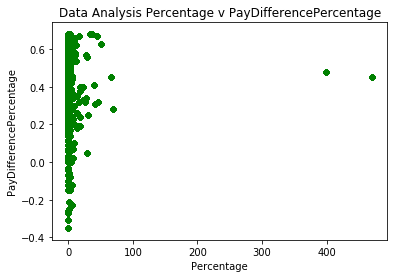

In [33]:
tech_chart = tech_datamerge.plot.scatter(x='Percentage', y='PayDifferencePercentage', color='g')
plt.title('Data Analysis Percentage v PayDifferencePercentage')

In [30]:
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


In [31]:
stats.ttest_ind(tech_datamerge['Percentage'], tech_datamerge['PayDifferencePercentage'], equal_var=False)

Ttest_indResult(statistic=135.88776418991898, pvalue=0.0)

In [32]:
stats.ttest_ind(tech_data2017, tech_data2018, equal_var=False)

C:\Users\adria\Anaconda3\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: can only concatenate str (not "int") to str